source/0189.pdf300.png
0189.pdf300
test/0189.pdf300/2372-1794-112-36.png
0.07411385327577591
test/0189.pdf300/1470-1309-120-37.png
0.03614164516329765
test/0189.pdf300/1838-1685-117-34.png
0.021021591499447823
test/0189.pdf300/1332-1274-120-38.png
0.08345852047204971
test/0189.pdf300/235-1531-108-40.png
0.08235325664281845
test/0189.pdf300/282-1310-116-35.png
0.016082370653748512
test/0189.pdf300/1424-1388-119-37.png
0.06196456402540207
test/0189.pdf300/877-1301-116-33.png
0.01739644818007946
test/0189.pdf300/417-1128-119-36.png
0.08264405280351639


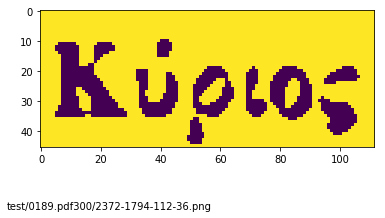

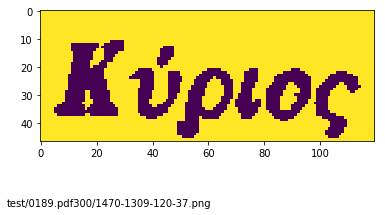

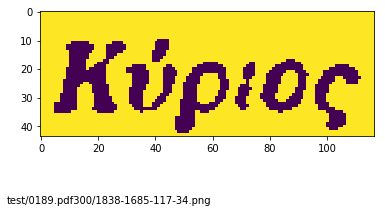

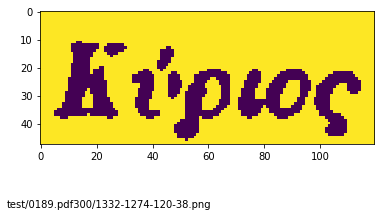

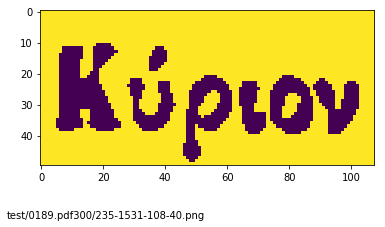

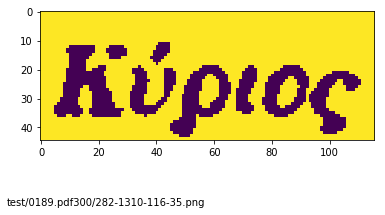

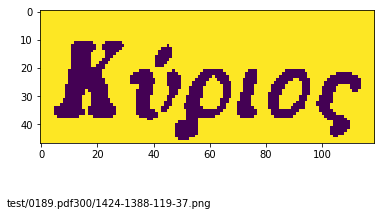

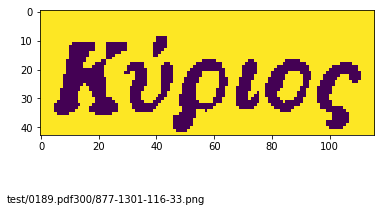

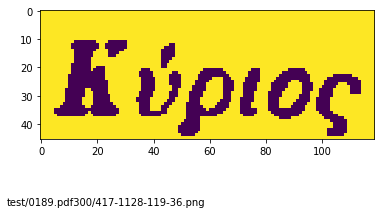

In [33]:
import cv2 as cv2  
from matplotlib import pyplot as plt
import numpy as np
import re

import shutil
import glob, os

%run PgFunctions.py 
ip=!wget -qO - ipv4bot.whatismyipaddress.com
def compareHUandSC(queryFile, dataFile):
        
        params={}
        
        query= cv2.imread("word/kyrios.png",0);
        erodeimg=applyCircleErosion(query)
        _, QueryContours, _ = cv2.findContours(erodeimg, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
        
        
        data = cv2.imread(filename,0)

        if data is None:
            params["DA"]="NONE"
            return
        else:
            params["DA"]="EXIST"
            erodedata=applyCircleErosion(data)
            _, DataContours, _ = cv2.findContours(erodedata, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
        
        
        
        if len(DataContours)>1:
            params["CO"]="EXIST"
           
            
            
            #cut off the very disimilar images using HU moments for speeding the algorithm
            ret = cv2.matchShapes(QueryContours[1],DataContours[1],3,0.0)
            params["HU"]=ret
            if ret<0.1:
                sd = cv2.createShapeContextDistanceExtractor()
                try:
                    abc = sd.computeDistance(QueryContours[1],DataContours[1])
                    params["SC-CM"]="EXIST"
                    params["SC"]=abc    
                    (x, y, w, h) = cv2.boundingRect(DataContours[1])   
                    OSfilename=Path(filename)
                    params["PA"]=OSfilename
                   
                except:
                    params["SC-CM"]="NONE" 
                    (x, y, w, h) = cv2.boundingRect(DataContours[1])
                    OSfilename=Path(filename)
                    params["PA"]=OSfilename
            #return
        else:
                params["CO"]="NONE"
                #print(filename)
                #x=0
        return params 
            
            
#END FUNCTION            
            
            
     
    
    
    
    
    
    
    
    
            
            
            



#query= cv2.imread("word/fos.png",0);
#query= cv2.imread("word/kyrios2.png",0);
#query= cv2.imread("word/kyrios.png",0);
wordlinks=[]

#for filename in glob.glob("source/*pdf300.png"):
#for filename in glob.glob("source/0177.pdf300.png"):
for filename in glob.glob("source/0189.pdf300.png"):    
    print(filename)
    filename_w_ext = os.path.basename(filename)
    name, extension = os.path.splitext(filename_w_ext)
    print(name)
    folder=name
    
    
    
    #erode query
    
    page=[]
    count=0
    
    
    content=''
    for filename in glob.glob("test/"+folder+"/*.png"):
        
        
        filename_w_ext = os.path.basename(filename)
        name, extension = os.path.splitext(filename_w_ext)
        
        coords=name.split("-")
        #print(coords)
        
        
        divB='<div style="'+'position: absolute;top: '+coords[0]+'px;left:'+coords[1]+'px;border: 3px solid red;position: absolute;">'
        divE='</div>'
        #!echo {divB}
        #print(divB)

        imgtag=divB+'<img src="'+ filename +'">'+divE
        
        content=content+imgtag
       
        #!echo {imgtag} > searchResults.html
        
        #break
        queryFile= "word/kyrios.png"
        dataFile=filename
        results=compareHUandSC(queryFile, dataFile)
        #print(results)
        if "SC" in results:
            if results["SC"]<0.1:
                f=results["PA"]
                print(results["PA"])
                print(results["SC"])
                
                #!echo {} >>searchResults2.txt
                
                #print(ip[0])
                fig=plt.figure()
                fig.text(.05,.05,results["PA"])
                img= cv2.imread(filename,0);
                plt.imshow(img)
    
    
    
    #!echo {content} > searchResults.html
    f = open("searchResults.html", "w")
    f.write(content)
    f.close()
    #print(count)
    #print(page)

    #erodeQuery=applyCircleErosion(query)
    ###
    ###
    
    
    
    
    

51.158.78.247
